# Fisheries Production Analysis

## SDG 14: Life Below Water

**Project Goal:** Analyze global fisheries production data and predict future trends

**Data Source:** World Bank (1963-2023)

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

## Step 2: Load Data

In [2]:
# Load cleaned data
df = pd.read_csv('fisheries_data_ml_ready.csv')

print(f"Total Records: {len(df):,}")
print(f"Countries: {df['Country Name'].nunique()}")
print(f"Year Range: {df['Year'].min()} to {df['Year'].max()}")

df.head()

Total Records: 15,906
Countries: 264
Year Range: 1963 to 2023


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Production,Production_Lag1,Production_Lag2,Production_Lag3,YoY_Change,Rolling_Mean_3Y
0,Afghanistan,AFG,Total fisheries production (metric tons),ER.FSH.PROD.MT,1963,300.0,300.0,300.0,200.0,0.000000,300.000000
1,Afghanistan,AFG,Total fisheries production (metric tons),ER.FSH.PROD.MT,1964,300.0,300.0,300.0,300.0,0.000000,300.000000
2,Afghanistan,AFG,Total fisheries production (metric tons),ER.FSH.PROD.MT,1965,300.0,300.0,300.0,300.0,0.000000,300.000000
3,Afghanistan,AFG,Total fisheries production (metric tons),ER.FSH.PROD.MT,1966,300.0,300.0,300.0,300.0,0.000000,300.000000
4,Afghanistan,AFG,Total fisheries production (metric tons),ER.FSH.PROD.MT,1967,400.0,300.0,300.0,300.0,0.333333,333.333333


## Step 3: Data Overview

In [3]:
# Check data structure
print("Dataset Information:")
print(df.info())

print("\nBasic Statistics:")
df[['Year', 'Production']].describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15906 entries, 0 to 15905
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     15906 non-null  object 
 1   Country Code     15906 non-null  object 
 2   Indicator Name   15906 non-null  object 
 3   Indicator Code   15906 non-null  object 
 4   Year             15906 non-null  int64  
 5   Production       15906 non-null  float64
 6   Production_Lag1  15906 non-null  float64
 7   Production_Lag2  15906 non-null  float64
 8   Production_Lag3  15906 non-null  float64
 9   YoY_Change       14745 non-null  float64
 10  Rolling_Mean_3Y  15906 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.3+ MB
None

Basic Statistics:


,Year,Production
count,15906.000000,1.590600e+04
mean,1993.026342,4.274953e+06
std,17.536109,1.733783e+07
min,1963.000000,0.000000e+00
25%,1978.000000,3.700000e+03
50%,1993.000000,5.607351e+04
75%,2008.000000,8.534914e+05
max,2023.000000,2.169865e+08


## Step 4: Global Production Trend

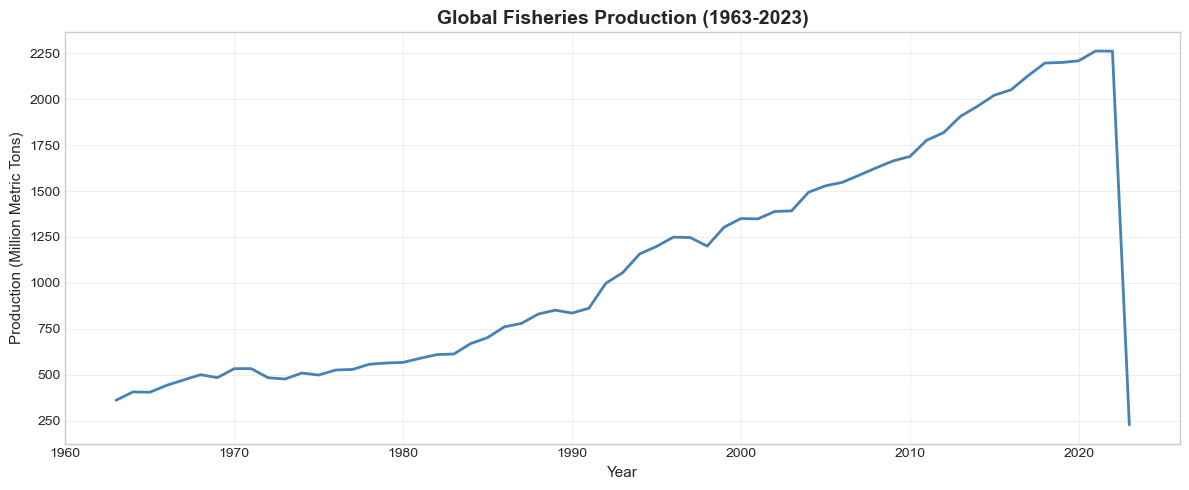

Production in 1963: 361.81 Million MT
Production in 2023: 227.67 Million MT
Growth: -37.1%


In [4]:
# Calculate total production per year
yearly_production = df.groupby('Year')['Production'].sum()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(yearly_production.index, yearly_production.values / 1e6, linewidth=2, color='steelblue')
plt.title('Global Fisheries Production (1963-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=11)
plt.ylabel('Production (Million Metric Tons)', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Production in 1963: {yearly_production.iloc[0]/1e6:.2f} Million MT")
print(f"Production in 2023: {yearly_production.iloc[-1]/1e6:.2f} Million MT")
print(f"Growth: {((yearly_production.iloc[-1]/yearly_production.iloc[0])-1)*100:.1f}%")

## Step 5: Top 10 Producing Countries

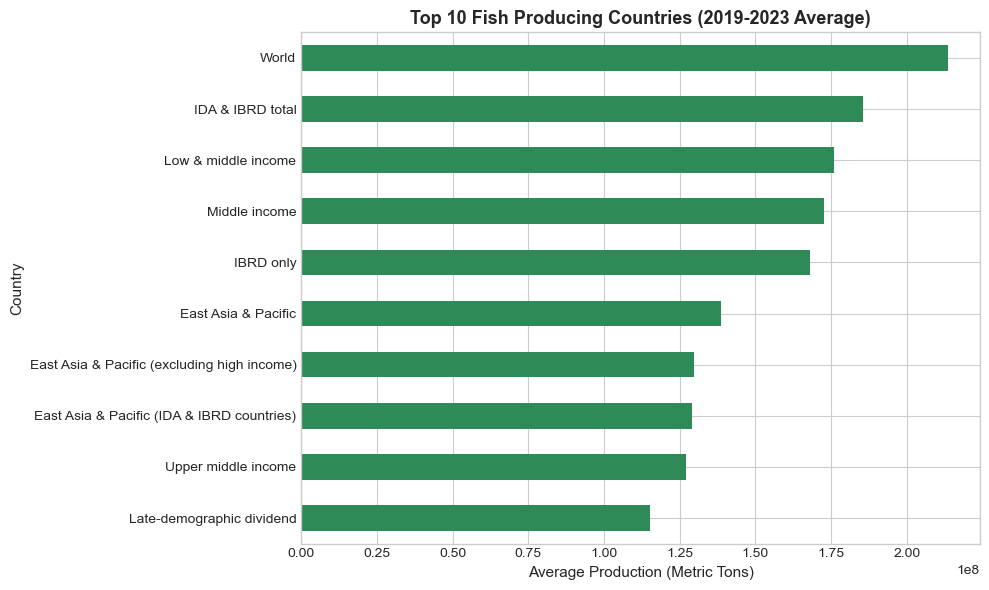


Top 10 Producers:
1. World: 213,474,586 MT
2. IDA & IBRD total: 185,634,273 MT
3. Low & middle income: 175,845,861 MT
4. Middle income: 172,573,547 MT
5. IBRD only: 168,154,771 MT
6. East Asia & Pacific: 138,584,810 MT
7. East Asia & Pacific (excluding high income): 129,670,229 MT
8. East Asia & Pacific (IDA & IBRD countries): 129,096,175 MT
9. Upper middle income: 127,070,978 MT
10. Late-demographic dividend: 115,031,674 MT


In [5]:
# Get recent data (last 5 years)
recent_data = df[df['Year'] >= 2019]

# Calculate average production
top10 = recent_data.groupby('Country Name')['Production'].mean().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
top10.plot(kind='barh', color='seagreen')
plt.title('Top 10 Fish Producing Countries (2019-2023 Average)', fontsize=13, fontweight='bold')
plt.xlabel('Average Production (Metric Tons)', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Producers:")
for i, (country, prod) in enumerate(top10.items(), 1):
    print(f"{i}. {country}: {prod:,.0f} MT")

## Step 6: Production Trends - Top 5 Countries

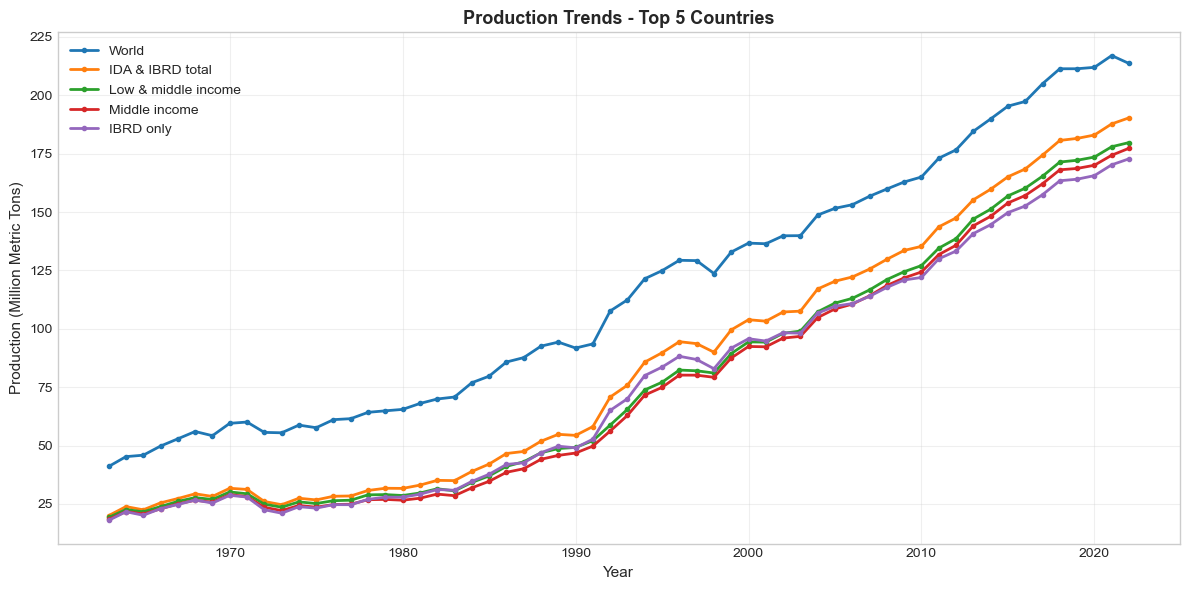

In [6]:
# Select top 5 countries
top5_countries = top10.head(5).index
df_top5 = df[df['Country Name'].isin(top5_countries)]

# Plot trends
plt.figure(figsize=(12, 6))
for country in top5_countries:
    country_data = df_top5[df_top5['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Production']/1e6, 
             marker='o', label=country, linewidth=2, markersize=3)

plt.title('Production Trends - Top 5 Countries', fontsize=13, fontweight='bold')
plt.xlabel('Year', fontsize=11)
plt.ylabel('Production (Million Metric Tons)', fontsize=11)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()